In [ ]:
#1(a)
import pandas as pd
import numpy as np

# Read the data from csv file
df = pd.read_csv('/content/Crime.csv')

# Display the first 5 rows of the dataframe
print(df.head())

<ipython-input-5-6dd421402db7>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Crime.csv')


   Incident ID  Offence Code  CR Number    Dispatch Date / Time  \
0    201166610          2308  170548599                     NaN   
1    201127168          3582   17014976                     NaN   
2    201095140          2303   16043118                     NaN   
3    201090710          5707   16037677                     NaN   
4    201359823          5404  220000965  01/09/2022 01:18:38 AM   

          Start_Date_Time End_Date_Time NIBRS Code  Victims  \
0  12/14/2017 04:30:00 PM           NaN        23D        1   
1  03/23/2017 11:33:00 PM           NaN        35A        1   
2  08/24/2016 09:47:00 PM           NaN        23C        1   
3  07/25/2016 05:31:00 PM           NaN        90J        1   
4  01/09/2022 01:34:00 AM           NaN        90D        1   

              Crime Name1                  Crime Name2  ...  PRA  \
0  Crime Against Property          Theft from Building  ...  270   
1   Crime Against Society     Drug/Narcotic Violations  ...  168   
2  Crime Again

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# 1(b)
df_cleaned = df.dropna(subset=['Dispatch Date / Time']).reset_index(drop=True)

# Drop rows with missing Dispatch Date / Time
df_cleaned = df_cleaned[['Dispatch Date / Time', 'Crime Name1', 'Victims','City']]

# Convert Dispatch Date / Time to datetime format
df_cleaned['Dispatch Date / Time'] = pd.to_datetime(df_cleaned['Dispatch Date / Time'])




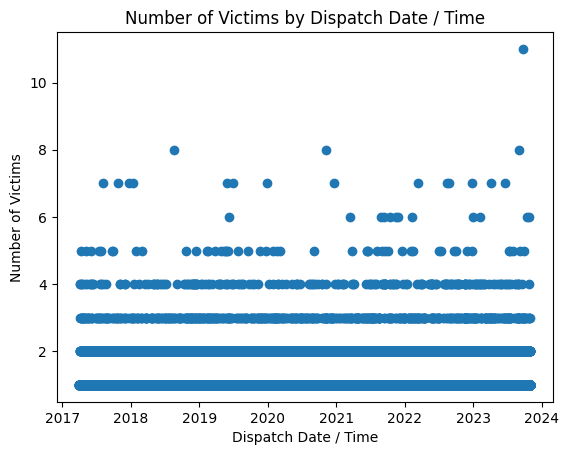

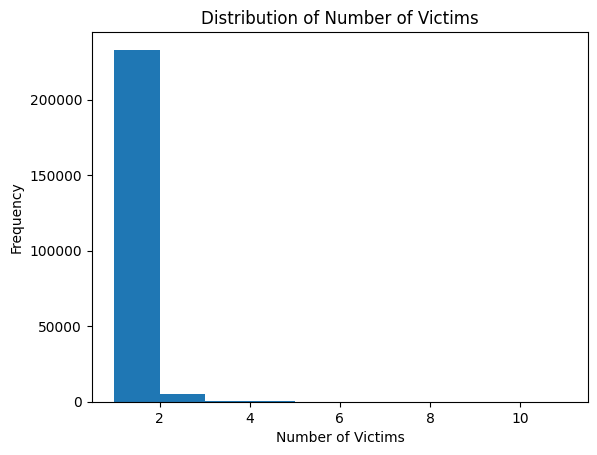

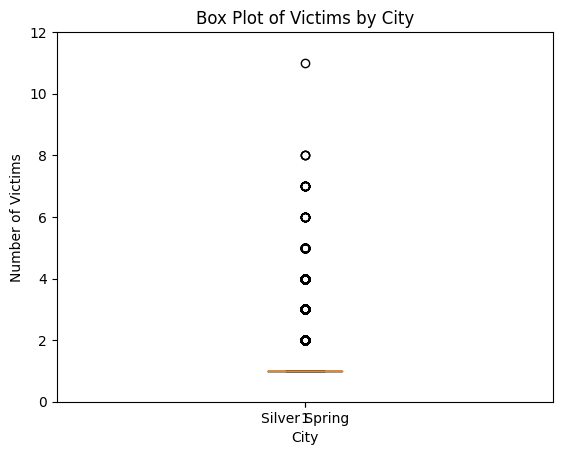

In [ ]:


import matplotlib.pyplot as plt


# 1c) Show graphs using Matplotlib

# Scatterplot of Victims vs Dispatch Date / Time
plt.scatter(df_cleaned['Dispatch Date / Time'], df_cleaned['Victims'])
plt.title('Number of Victims by Dispatch Date / Time')
plt.xlabel('Dispatch Date / Time')
plt.ylabel('Number of Victims')
plt.show()

# Histogram of Victims
plt.hist(df_cleaned['Victims'], bins=10)
plt.title('Distribution of Number of Victims')
plt.xlabel('Number of Victims')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Victims by City
s=df.loc[df['City']=='Silver Spring','Victims'].values

plt.boxplot([s],labels=['Silver Spring'])
plt.boxplot(df_cleaned['Victims'])
plt.title('Box Plot of Victims by City')
plt.xlabel('City')
plt.ylabel('Number of Victims')

plt.ylim(0, 12)
plt.show()


In [ ]:
# 1d) Use nonparametric inference for the median of a continuous variable using bootstrap simulation
n_simulations = 1000  # Number of bootstrap simulations
medians = []  # Store the medians from each simulation

# Perform bootstrap simulations
for _ in range(n_simulations):
    bootstrap_sample = np.random.choice(df_cleaned['Victims'], size=len(df_cleaned), replace=True)
    medians.append(np.median(bootstrap_sample))

# Calculate the bootstrap 95% confidence interval for the median
lower_ci = np.percentile(medians, 2.5)
upper_ci = np.percentile(medians, 97.5)

print(f"Bootstrap 95% Confidence Interval for the Median: [{lower_ci}, {upper_ci}]")

Bootstrap 95% Confidence Interval for the Median: [1.0, 1.0]
